In [ ]:
# Import library
import pandas as pd
import numpy as np
import sklearn.metrics as sm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [ ]:
# Melakukan load dataset
data_url = "https://raw.githubusercontent.com/bachtiarrizkyal/Dataset/main/Jakarta%202015%20-%202022.csv"

# Menyimpan dataset ke dataframe
df = pd.read_csv(data_url)
df

,datetime,total_visitor,total_accomodation
0,1/1/2014,193017,16332
1,2/1/2014,185851,17101
2,3/1/2014,204004,17438
3,4/1/2014,186373,17943
4,5/1/2014,190716,18123
...,...,...,...
103,8/1/2022,121438,68569
104,9/1/2022,111139,69382
105,10/1/2022,112588,69626
106,11/1/2022,113958,69843


In [ ]:
# Mengecek apakah ada data yang bernilai null
print(df.isnull().sum())

datetime              0
total_visitor         0
total_accomodation    0
dtype: int64


In [ ]:
# Mengubah kolom datetime ke format datetime
df['datetime'] = pd.to_datetime(df['datetime'])
df

,datetime,total_visitor,total_accomodation
0,2014-01-01,193017,16332
1,2014-02-01,185851,17101
2,2014-03-01,204004,17438
3,2014-04-01,186373,17943
4,2014-05-01,190716,18123
...,...,...,...
103,2022-08-01,121438,68569
104,2022-09-01,111139,69382
105,2022-10-01,112588,69626
106,2022-11-01,113958,69843


In [ ]:
# Melakukan shuffle
X, y = shuffle(df['total_visitor'].values.reshape(-1,1), df['total_accomodation'].values, random_state=1)

**SCENARIO : 80% Train - 20% Test**

In [ ]:
# Membagi 80% data untuk train dan 20% data untuk test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [ ]:
# Menampilkan hasil
lengths = {
    'X_train': len(X_train),
    'y_train': len(y_train),
    'X_test': len(X_test),
    'y_test': len(y_test)
}

# Ubah variabel length ke dataframe
lengths_df = pd.DataFrame.from_dict(lengths, orient='index', columns=['Length'])

print(lengths_df)

         Length
X_train      86
y_train      86
X_test       22
y_test       22


In [ ]:
# Menentukan parameter untuk GridSearch
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'epsilon': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

In [ ]:
# Membuat instance GridSearchCV
grid_search = GridSearchCV(estimator=SVR(), param_grid=param_grid, refit=True, verbose=3, cv=3)

# Menyesuaikan model dengan parameter terbaik
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV 1/3] END C=0.01, epsilon=0.01, kernel=linear;, score=0.321 total time=   0.0s
[CV 2/3] END C=0.01, epsilon=0.01, kernel=linear;, score=0.575 total time=   0.0s
[CV 3/3] END C=0.01, epsilon=0.01, kernel=linear;, score=0.384 total time=   0.0s
[CV 1/3] END .C=0.01, epsilon=0.01, kernel=rbf;, score=-0.075 total time=   0.0s
[CV 2/3] END .C=0.01, epsilon=0.01, kernel=rbf;, score=-0.216 total time=   0.0s
[CV 3/3] END .C=0.01, epsilon=0.01, kernel=rbf;, score=-0.095 total time=   0.0s
[CV 1/3] END C=0.01, epsilon=0.01, kernel=poly;, score=-0.075 total time=   0.0s
[CV 2/3] END C=0.01, epsilon=0.01, kernel=poly;, score=-0.214 total time=   0.0s
[CV 3/3] END C=0.01, epsilon=0.01, kernel=poly;, score=-0.096 total time=   0.0s
[CV 1/3] END C=0.01, epsilon=0.01, kernel=sigmoid;, score=-0.075 total time=   0.0s
[CV 2/3] END C=0.01, epsilon=0.01, kernel=sigmoid;, score=-0.216 total time=   0.0s
[CV 3/3] END C=0.01, epsilon=0.01, ker

GridSearchCV(cv=3, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'epsilon': [0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             verbose=3)

In [ ]:
# Mendapatkan parameter terbaik berdasarkan GridSearchCV
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 1, 'epsilon': 0.01, 'kernel': 'linear'}


In [ ]:
# Membuat prediksi dengan model terbaik
best_regressor = grid_search.best_estimator_
y_pred = best_regressor.predict(X_test)\

regressor = SVR(C=best_params['C'], epsilon=best_params['epsilon'], kernel=best_params['kernel'])
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("MSE = ", round(mse, 2))
print("MAE = ", round(mae, 2))
print("MAPE = ", round(mape, 2), "%")

MSE =  169866101.33
MAE =  11749.61
MAPE =  40.68 %


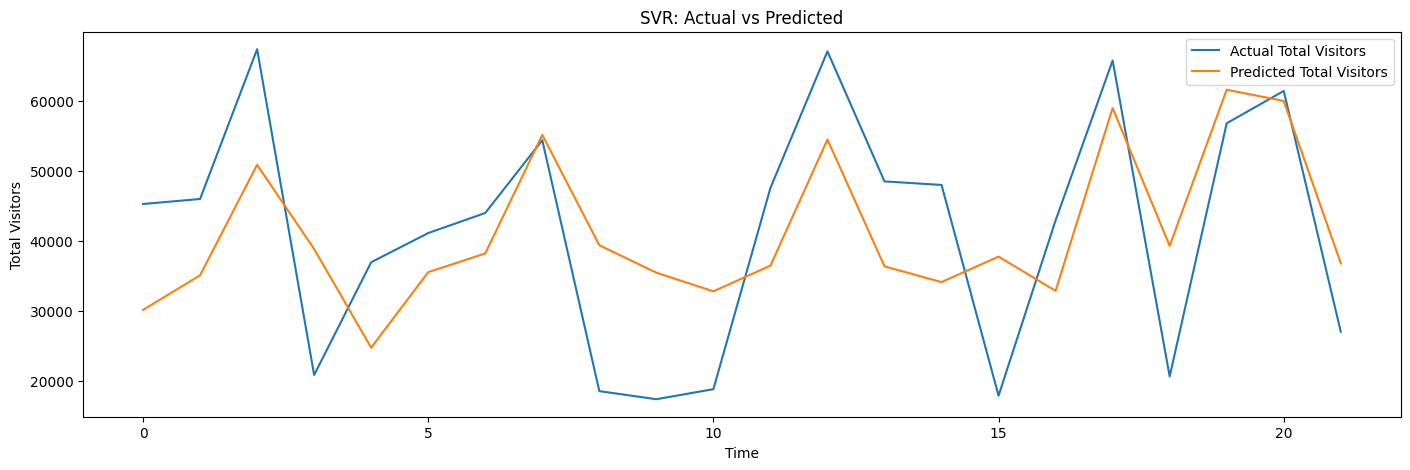

In [ ]:
# Grafik garis untuk visualisasi predicted vs actual values
plt.figure(figsize=(17, 5))

# Plotting actual values
plt.plot(y_test, label='Actual Total Visitors')

# Plotting predicted values
plt.plot(y_pred, label='Predicted Total Visitors')

plt.title('SVR: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Total Visitors')
plt.legend()
plt.show()

In [ ]:
# Forecast 12 periode
df_forecast = pd.DataFrame({
    'datetime': pd.date_range(start=df['datetime'].max() + pd.DateOffset(months=1), periods=12, freq='M'),
    'total_accomodation': np.random.randint(low=df['total_accomodation'].min(),
                                            high=df['total_accomodation'].max(),
                                            size=12)
})

# Reshape total_accomodation untuk prediksi
X_forecast = df_forecast['total_accomodation'].values.reshape(-1, 1)

# Buat prediksi untuk 12 periode
y_forecast = best_regressor.predict(X_forecast)

# Menambahkan nilai forecaste ke to df_forecast
df_forecast['forecasted_total_visitor'] = y_forecast

# Print hasil forecast
print("Forecast for the Next 12 Periods:")
print(df_forecast[['datetime', 'forecasted_total_visitor']])

Forecast for the Next 12 Periods:
     datetime  forecasted_total_visitor
0  2023-01-31              55642.523201
1  2023-02-28              53518.131508
2  2023-03-31              55314.834160
3  2023-04-30              54443.768601
4  2023-05-31              53286.982102
5  2023-06-30              56168.878597
6  2023-07-31              53355.196511
7  2023-08-31              59160.957619
8  2023-09-30              59721.095392
9  2023-10-31              55394.092812
10 2023-11-30              53026.208145
11 2023-12-31              58763.754841


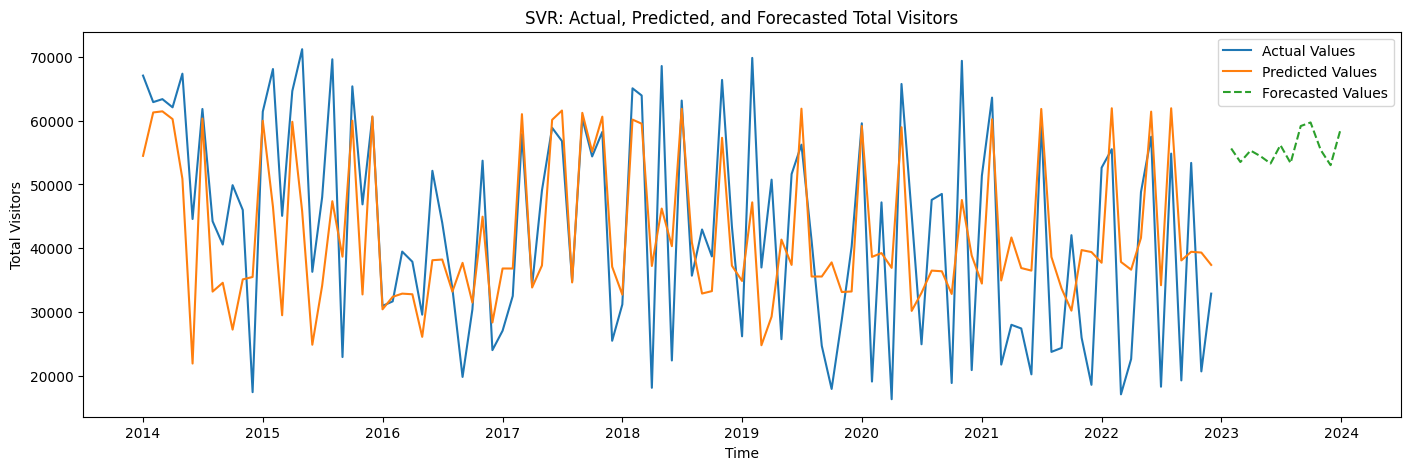

In [ ]:
# Plot nilai forecasting dengan actual dan predicted values
plt.figure(figsize=(17, 5))

# Plotting actual values
plt.plot(df['datetime'], y, label='Actual Values')

# Plotting predicted values
plt.plot(df['datetime'], best_regressor.predict(X), label='Predicted Values')

# Plotting hasil forecasted values
plt.plot(df_forecast['datetime'], y_forecast, label='Forecasted Values', linestyle='dashed')

plt.title('SVR: Actual, Predicted, and Forecasted Total Visitors')
plt.xlabel('Time')
plt.ylabel('Total Visitors')
plt.legend()
plt.show()

**SCENARIO : 70% Train - 30% Test**

In [ ]:
# Memabagi 70% data untuk train dan 30% data untuk test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [ ]:
# Menampilkan hasil
lengths = {
    'X_train': len(X_train),
    'y_train': len(y_train),
    'X_test': len(X_test),
    'y_test': len(y_test)
}

# Ubah variabel lengths ke dataframe
lengths_df = pd.DataFrame.from_dict(lengths, orient='index', columns=['Length'])

print(lengths_df)

         Length
X_train      75
y_train      75
X_test       33
y_test       33


In [ ]:
# Menentukan parameter untuk GridSearch
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'epsilon': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

In [ ]:
# Membuat instance GridSearchCV
grid_search = GridSearchCV(estimator=SVR(), param_grid=param_grid, refit=True, verbose=3, cv=3)

# Menyesuaikan model dengan parameter terbaik
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV 1/3] END C=0.01, epsilon=0.01, kernel=linear;, score=0.386 total time=   0.0s
[CV 2/3] END C=0.01, epsilon=0.01, kernel=linear;, score=0.565 total time=   0.0s
[CV 3/3] END C=0.01, epsilon=0.01, kernel=linear;, score=0.412 total time=   0.0s
[CV 1/3] END .C=0.01, epsilon=0.01, kernel=rbf;, score=-0.001 total time=   0.0s
[CV 2/3] END .C=0.01, epsilon=0.01, kernel=rbf;, score=-0.017 total time=   0.0s
[CV 3/3] END .C=0.01, epsilon=0.01, kernel=rbf;, score=-0.031 total time=   0.0s
[CV 1/3] END .C=0.01, epsilon=0.01, kernel=poly;, score=0.001 total time=   0.0s
[CV 2/3] END C=0.01, epsilon=0.01, kernel=poly;, score=-0.015 total time=   0.0s
[CV 3/3] END C=0.01, epsilon=0.01, kernel=poly;, score=-0.031 total time=   0.0s
[CV 1/3] END C=0.01, epsilon=0.01, kernel=sigmoid;, score=-0.001 total time=   0.0s
[CV 2/3] END C=0.01, epsilon=0.01, kernel=sigmoid;, score=-0.017 total time=   0.0s
[CV 3/3] END C=0.01, epsilon=0.01, ker

GridSearchCV(cv=3, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'epsilon': [0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             verbose=3)

In [ ]:
# Mendapatkan parameter terbaik berdasarkan GridSearchCV
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 0.1, 'epsilon': 1, 'kernel': 'linear'}


In [ ]:
# Membuat prediksi dengan model terbaik
best_regressor = grid_search.best_estimator_
y_pred = best_regressor.predict(X_test)\

regressor = SVR(C=best_params['C'], epsilon=best_params['epsilon'], kernel=best_params['kernel'])
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("MSE = ", round(mse, 2))
print("MAE = ", round(mae, 2))
print("MAPE = ", round(mape, 2), "%")

MSE =  160393822.24
MAE =  11080.85
MAPE =  37.58 %


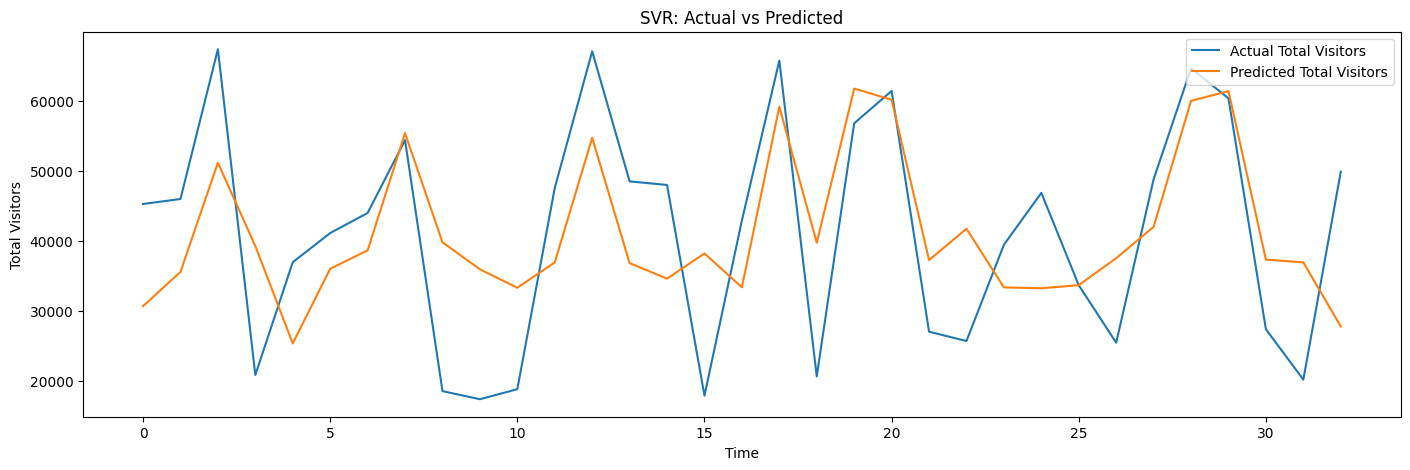

In [ ]:
# Grafik garis untuk visualisasi predicted vs actual values
plt.figure(figsize=(17, 5))

# Plotting actual values
plt.plot(y_test, label='Actual Total Visitors')

# Plotting predicted values
plt.plot(y_pred, label='Predicted Total Visitors')

plt.title('SVR: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Total Visitors')
plt.legend()
plt.show()

In [ ]:
# Forecast 12 periode
df_forecast = pd.DataFrame({
    'datetime': pd.date_range(start=df['datetime'].max() + pd.DateOffset(months=1), periods=12, freq='M'),
    'total_accomodation': np.random.randint(low=df['total_accomodation'].min(),
                                            high=df['total_accomodation'].max(),
                                            size=12)
})

# Reshape total_accomodation untuk prediksi
X_forecast = df_forecast['total_accomodation'].values.reshape(-1, 1)

# Buat prediksi untuk 12 periode
y_forecast = best_regressor.predict(X_forecast)

# Menambahkan nilai forecaste ke to df_forecast
df_forecast['forecasted_total_visitor'] = y_forecast

# Print hasil forecast
print("Forecast for the Next 12 Periods:")
print(df_forecast[['datetime', 'forecasted_total_visitor']])

Forecast for the Next 12 Periods:
     datetime  forecasted_total_visitor
0  2023-01-31              58289.114395
1  2023-02-28              54639.557634
2  2023-03-31              54297.860954
3  2023-04-30              56499.121818
4  2023-05-31              59347.706636
5  2023-06-30              56120.200474
6  2023-07-31              56759.052615
7  2023-08-31              56796.148910
8  2023-09-30              59061.461856
9  2023-10-31              55403.946722
10 2023-11-30              57991.573857
11 2023-12-31              59367.089129


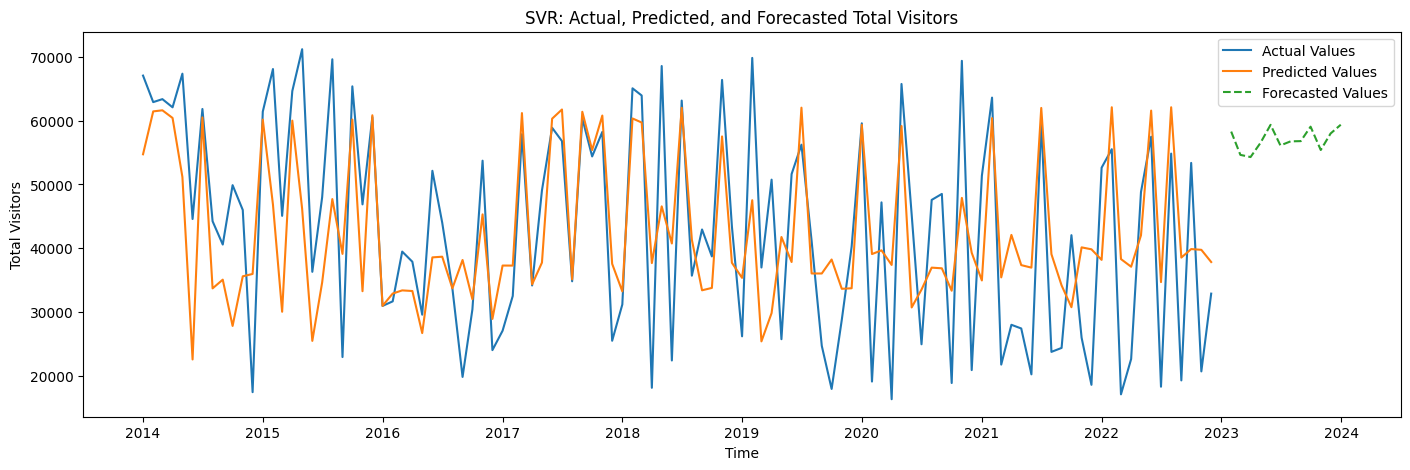

In [ ]:
# Plot nilai forecasting dengan actual dan predicted values
plt.figure(figsize=(17, 5))

# Plotting actual values
plt.plot(df['datetime'], y, label='Actual Values')

# Plotting predicted values
plt.plot(df['datetime'], best_regressor.predict(X), label='Predicted Values')

# Plotting hasil forecasted values
plt.plot(df_forecast['datetime'], y_forecast, label='Forecasted Values', linestyle='dashed')

plt.title('SVR: Actual, Predicted, and Forecasted Total Visitors')
plt.xlabel('Time')
plt.ylabel('Total Visitors')
plt.legend()
plt.show()

**SCENARIO : 60% Train - 40% Test**

In [ ]:
# Memabagi 60% data untuk train dan 40% data untuk test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 42)

In [ ]:
# Menampilkan hasil
lengths = {
    'X_train': len(X_train),
    'y_train': len(y_train),
    'X_test': len(X_test),
    'y_test': len(y_test)
}

# Ubah variabel lengths ke dataframe
lengths_df = pd.DataFrame.from_dict(lengths, orient='index', columns=['Length'])

print(lengths_df)

         Length
X_train      64
y_train      64
X_test       44
y_test       44


In [ ]:
# Menentukan parameter untuk GridSearch
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'epsilon': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

In [ ]:
# Membuat instance GridSearchCV
grid_search = GridSearchCV(estimator=SVR(), param_grid=param_grid, refit=True, verbose=3, cv=3)

# Menyesuaikan model dengan parameter terbaik
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV 1/3] END C=0.01, epsilon=0.01, kernel=linear;, score=0.173 total time=   0.0s
[CV 2/3] END C=0.01, epsilon=0.01, kernel=linear;, score=0.431 total time=   0.0s
[CV 3/3] END C=0.01, epsilon=0.01, kernel=linear;, score=0.362 total time=   0.0s
[CV 1/3] END .C=0.01, epsilon=0.01, kernel=rbf;, score=-0.202 total time=   0.0s
[CV 2/3] END .C=0.01, epsilon=0.01, kernel=rbf;, score=-0.040 total time=   0.0s
[CV 3/3] END .C=0.01, epsilon=0.01, kernel=rbf;, score=-0.315 total time=   0.0s
[CV 1/3] END C=0.01, epsilon=0.01, kernel=poly;, score=-0.199 total time=   0.0s
[CV 2/3] END C=0.01, epsilon=0.01, kernel=poly;, score=-0.039 total time=   0.0s
[CV 3/3] END C=0.01, epsilon=0.01, kernel=poly;, score=-0.315 total time=   0.0s
[CV 1/3] END C=0.01, epsilon=0.01, kernel=sigmoid;, score=-0.202 total time=   0.0s
[CV 2/3] END C=0.01, epsilon=0.01, kernel=sigmoid;, score=-0.040 total time=   0.0s
[CV 3/3] END C=0.01, epsilon=0.01, ker

GridSearchCV(cv=3, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'epsilon': [0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             verbose=3)

In [ ]:
# Mendapatkan parameter terbaik berdasarkan GridSearchCV
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 1, 'epsilon': 1, 'kernel': 'linear'}


In [ ]:
# Membuat prediksi dengan model terbaik
best_regressor = grid_search.best_estimator_
y_pred = best_regressor.predict(X_test)\

regressor = SVR(C=best_params['C'], epsilon=best_params['epsilon'], kernel=best_params['kernel'])
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("MSE = ", round(mse, 2))
print("MAE = ", round(mae, 2))
print("MAPE = ", round(mape, 2), "%")

MSE =  159423625.85
MAE =  10630.47
MAPE =  35.47 %


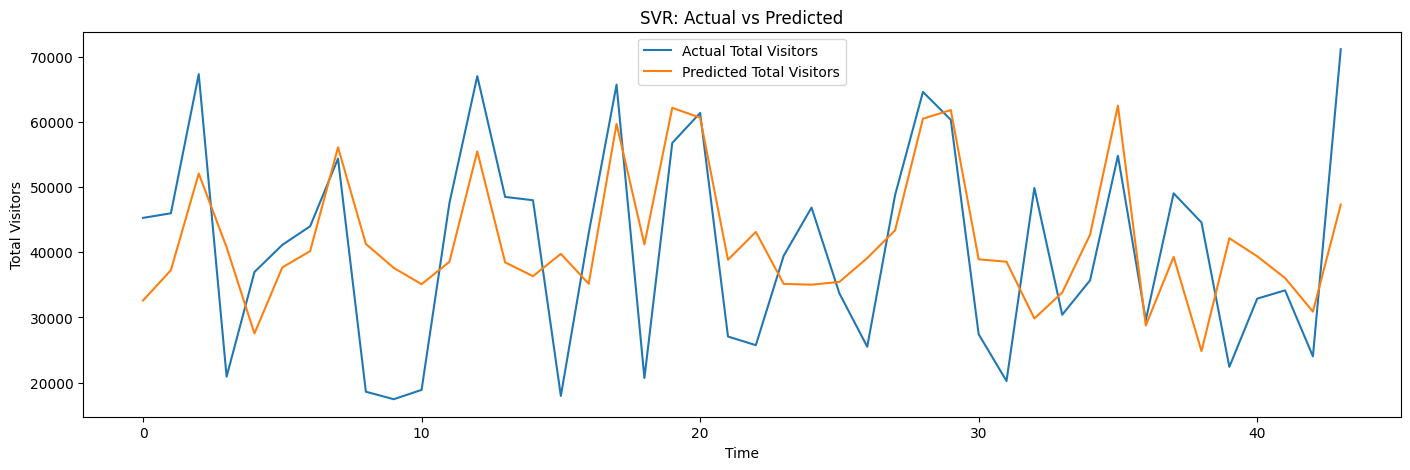

In [ ]:
# Grafik garis untuk visualisasi predicted vs actual values
plt.figure(figsize=(17, 5))

# Plotting actual values
plt.plot(y_test, label='Actual Total Visitors')

# Plotting predicted values
plt.plot(y_pred, label='Predicted Total Visitors')

plt.title('SVR: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Total Visitors')
plt.legend()
plt.show()

In [ ]:
# Forecast 12 periode
df_forecast = pd.DataFrame({
    'datetime': pd.date_range(start=df['datetime'].max() + pd.DateOffset(months=1), periods=12, freq='M'),
    'total_accomodation': np.random.randint(low=df['total_accomodation'].min(),
                                            high=df['total_accomodation'].max(),
                                            size=12)
})

# Reshape total_accomodation untuk prediksi
X_forecast = df_forecast['total_accomodation'].values.reshape(-1, 1)

# Buat prediksi untuk 12 periode
y_forecast = best_regressor.predict(X_forecast)

# Menambahkan nilai forecaste ke to df_forecast
df_forecast['forecasted_total_visitor'] = y_forecast

# Print hasil forecast
print("Forecast for the Next 12 Periods:")
print(df_forecast[['datetime', 'forecasted_total_visitor']])

Forecast for the Next 12 Periods:
     datetime  forecasted_total_visitor
0  2023-01-31              59155.230945
1  2023-02-28              56308.003715
2  2023-03-31              56935.402439
3  2023-04-30              58083.205455
4  2023-05-31              59397.131412
5  2023-06-30              59507.431169
6  2023-07-31              58970.377857
7  2023-08-31              58223.987610
8  2023-09-30              58562.844131
9  2023-10-31              58431.855514
10 2023-11-30              54879.738163
11 2023-12-31              59290.381813


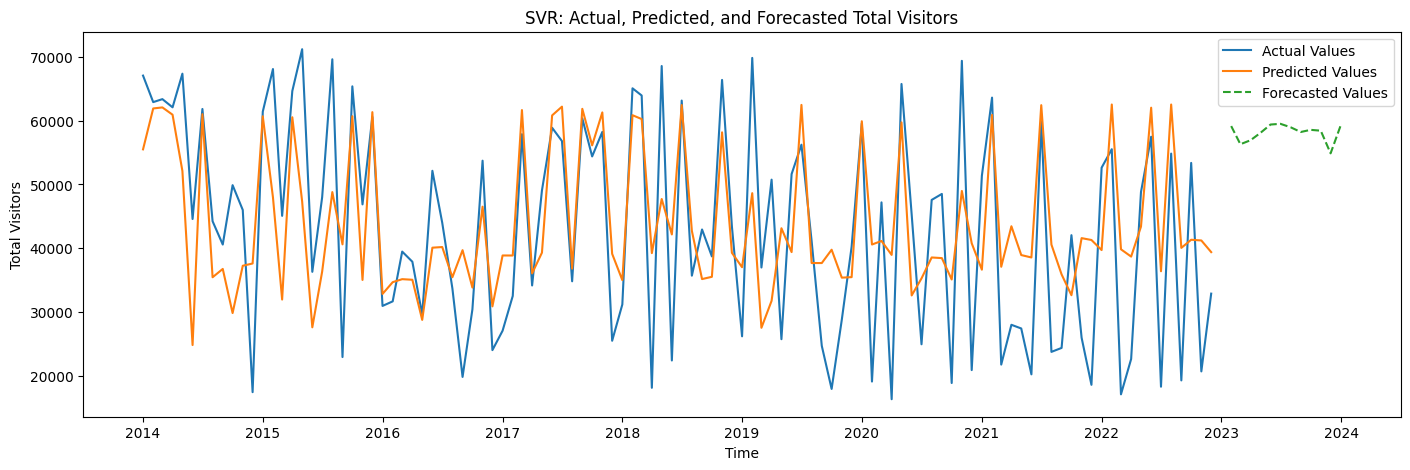

In [ ]:
# Plot nilai forecasting dengan actual dan predicted values
plt.figure(figsize=(17, 5))

# Plotting actual values
plt.plot(df['datetime'], y, label='Actual Values')

# Plotting predicted values
plt.plot(df['datetime'], best_regressor.predict(X), label='Predicted Values')

# Plotting hasil forecasted values
plt.plot(df_forecast['datetime'], y_forecast, label='Forecasted Values', linestyle='dashed')

plt.title('SVR: Actual, Predicted, and Forecasted Total Visitors')
plt.xlabel('Time')
plt.ylabel('Total Visitors')
plt.legend()
plt.show()